## 対応ありの平均値の差の検定（t検定）
対応ありの場合（投薬前後で血圧に差はあるのか？ということを調べる。）   
→前と後の変化量に差はあるのかを検定する必要がある。  
→変化量がゼロであれば変化がないよねってなる。  

この変化量$\bar{d}=\bar{x_1} - \bar{x_2}$はどのような分布に従うのか？？  
→平均$μ_d$,分散$\frac{σ^2_d}{n}$の正規分布に従う。  

- 標準化を行い、どこが棄却域になるのかをわかるようにする。
$z = \frac{\bar{d} - μ_d}{\frac{σ_d}{\sqrt{n}}}$  
→しかしこれだと$σ_d$の値がわからないため、不偏分散を使用する。

- 不偏分散を使用した場合、以下の値はt分布に従う。  
$t = \frac{\bar{d} - μ_d}{\frac{s_d}{\sqrt{n}}}$  
→今回、帰無仮説により$μ_d$の値は０  
$t = \frac{\bar{d}}{\frac{s_d}{\sqrt{n}}}$  
→この値が棄却域に行くのかいかないのかを判断していく必要がある。  
→上記は自由度n-1のt分布に従う。

帰無仮説：差はない。
対立仮説：差はある。


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.api import qqplot
%matplotlib inline
df = sns.load_dataset("tips")
df["tip_rate"] = df["tip"] / df["total_bill"]

## 対応のある平均値差の検定
- stats.ttest_rel(a,b)  
戻り値  
- 第一戻り値：検定統計量t  
- 第二戻り値：p値　　

# 注意！
今回の分析は対応のある平均値の差の検定であるため、a,bのデータが対応しているようになっていなければならない。

In [3]:
blood_df = pd.read_csv("./blood_pressure.csv")

In [4]:
blood_df.head()

,patient,sex,agegrp,bp_before,bp_after
0,1,Male,30-45,143,153
1,2,Male,30-45,163,170
2,3,Male,30-45,153,168
3,4,Male,30-45,153,142
4,5,Male,30-45,146,141


In [9]:
# 初めにbeforeとafterで差があるのかを確認する！
blood_df["diff"] = blood_df["bp_before"] - blood_df["bp_after"]
blood_df["diff"].mean()
# 以下の値を確認するとゼロになっていないので、差はあるのではないか？とみる事ができる。


5.091666666666667

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diff'>

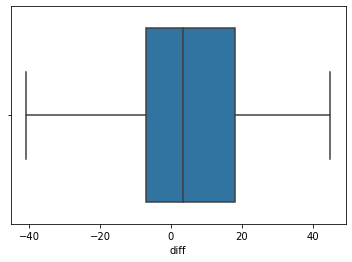

In [12]:
sns.boxplot(blood_df["diff"])

In [11]:
# 片側検定（"bp_before"＞"bp_after"であるとき）
stats.ttest_rel(blood_df["bp_before"] ,blood_df["bp_after"] , alternative="greater")

Ttest_relResult(statistic=3.3371870510833657, pvalue=0.0005648957322420411)